This notebook requires scikit-learn >= 0.21.2

- [Exporing the dataset](#Exploring-the-dataset)
- [Bootstrapping](#Bootstrapping)
- [Modelling](#Modelling)
- [Finding most important features](#Finding-most-important-features)
- [Comments](#Comments)

In [28]:
# Reading fields file
fields = open('field_names.txt', 'r').readlines()
fields = list(map(lambda x:x.replace('\n', ''), fields))

In [29]:
import pandas as pd

data = pd.read_csv('breast-cancer.csv', names=fields)
data.head()

,ID,diagnosis,radius_mean,radius_sd_error,radius_worst,texture_mean,texture_sd_error,texture_worst,perimeter_mean,perimeter_sd_error,...,concavity_worst,concave_points_mean,concave_points_sd_error,concave_points_worst,symmetry_mean,symmetry_sd_error,symmetry_worst,fractal_dimension_mean,fractal_dimension_sd_error,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Exploring the dataset

There are no empty records in the dataset. If there was any, I would have use an imputer to fill empty score with the median/mean value since we are in a case of numerical data.

In [30]:
False in (data.isna().sum() == 0)

False

We are dropping IDs since their are not explaining the data.

In [31]:
data = data.drop('ID', axis=1)
X = data.drop('diagnosis', axis=1)
y = data.diagnosis

In [32]:
#Data viz libraries

%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

Let's check our target.

B    357
M    212
Name: diagnosis, dtype: int64

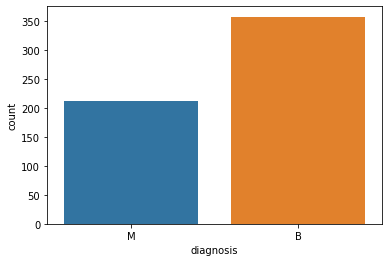

In [33]:
sns.countplot(data.diagnosis) 
data.diagnosis.value_counts()

We have a fairly balanced dataset with 1,68 times more benign cases than malignant ones. It allows us to identity in what kind of classification case we are. In the case where we have an unbalanced dataset, then we would need to be carefull to sample correctly the data by keeping the class ratio.

To evaluate the features available in the dataset, we need to check if we have colinear features, which would mean that they are correlated and could impact the complexity of the model by introducing unnecessary features.

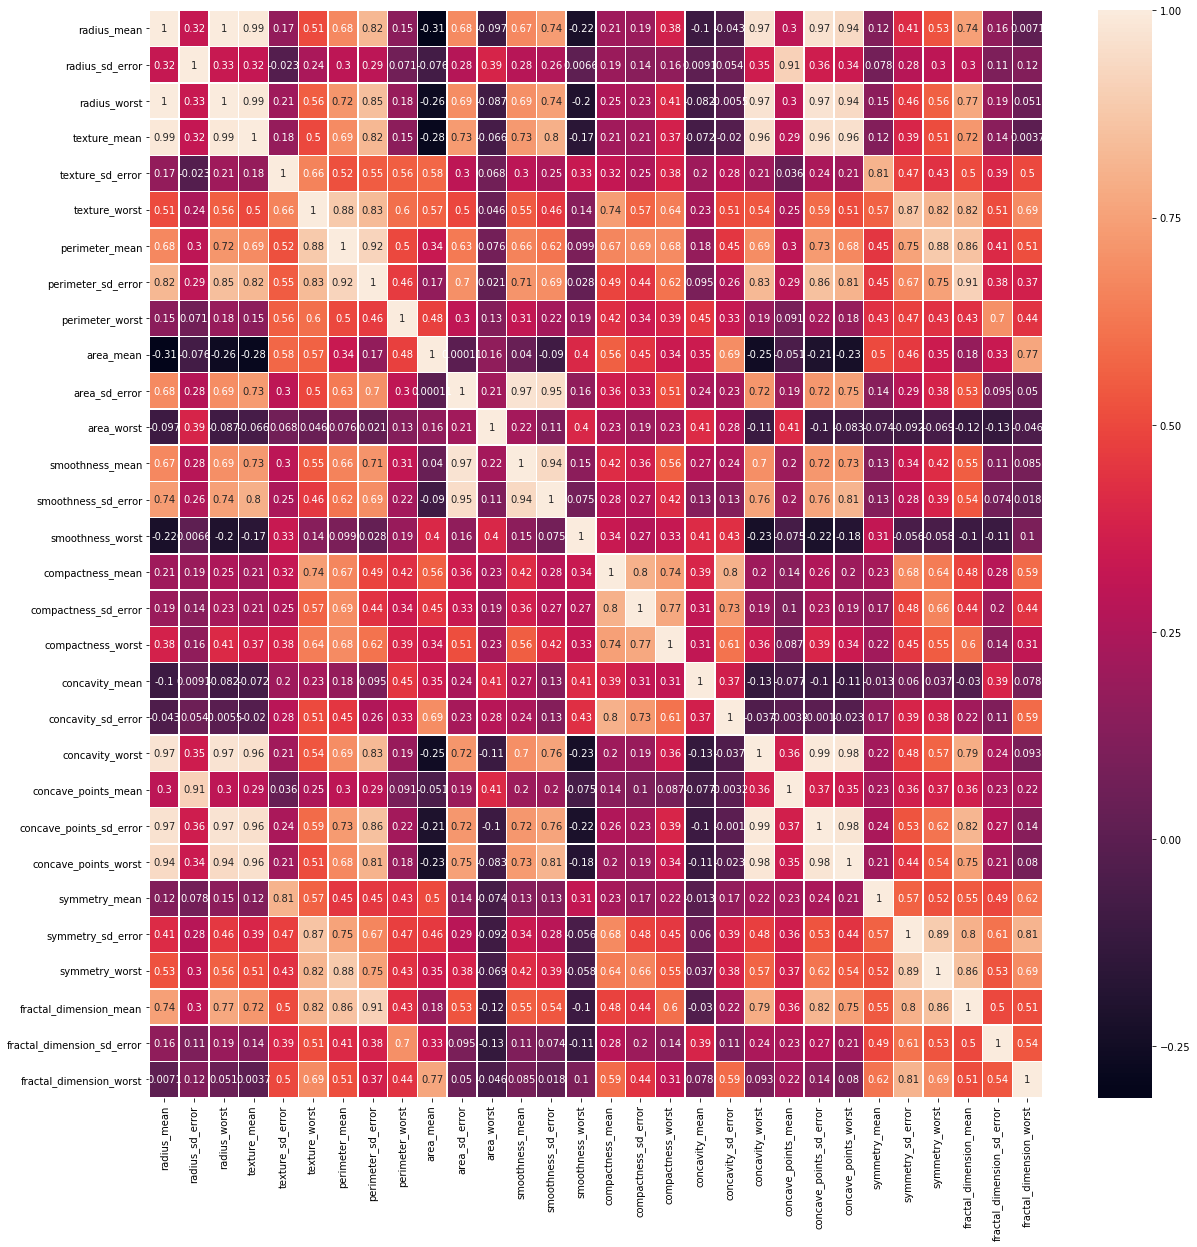

In [34]:
figure, ax = plt.subplots(figsize=(20,20))
sns.heatmap(X.corr(), annot=True, linewidths=.5, ax=ax)

This matrix show all correlated features : 
 - radius_mean, radius_worst, texture_mean, concavity_worst, concave_points_sd_error, concave_points_worst
 - perimeter_sd_error, perimeter_mean, texture_worst, fractal_dimension_mean
 - symmetry_sd_error, symmetry_worst, perimeter_mean
 - smoothness_sd_error, smoothness_mean, area_sd_error
 
 We choose to keep **perimeter_mean**, **smoothness_mean** and **radius_mean** as parameters from those correlated features.

In [35]:
features = ['perimeter_mean',
             'smoothness_mean',
             'radius_mean',
             'radius_sd_error',
             'texture_sd_error',
             'perimeter_worst',
             'area_mean',
             'area_worst',
             'smoothness_worst',
             'compactness_mean',
             'compactness_sd_error',
             'compactness_worst',
             'concavity_mean',
             'concavity_sd_error',
             'concave_points_mean',
             'symmetry_mean',
             'fractal_dimension_sd_error',
             'fractal_dimension_worst']

X_norm = (X - X.mean())/X.std()

In [36]:
print('Mean Smoothness for Malignant cases : %s' %X_norm[data.diagnosis == 'M']['smoothness_mean'].mean())
print('Median Smoothness for Malignant cases : %s' %X_norm[data.diagnosis == 'M']['smoothness_mean'].median())
print('Mean Smoothness for Benign cases : %s' %X_norm[data.diagnosis == 'B']['smoothness_mean'].mean())
print('Median Smoothness for Benign cases : %s' %X_norm[data.diagnosis == 'B']['smoothness_mean'].median())

Mean Smoothness for Malignant cases : 0.7210558324558535
Median Smoothness for Malignant cases : 0.40232407996917197
Mean Smoothness for Benign cases : -0.4281900181530529
Median Smoothness for Benign cases : -0.502043643388796


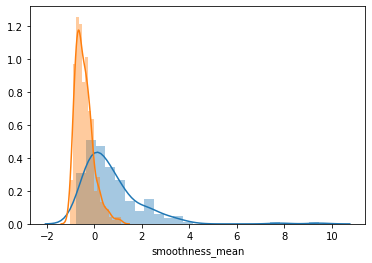

In [37]:
plot_m = sns.distplot(X_norm[data.diagnosis == 'M']['smoothness_mean'])
plot_b = sns.distplot(X_norm[data.diagnosis == 'B']['smoothness_mean'])

In [38]:
print('Mean Compactness for Malignant cases : %s' %X_norm[data.diagnosis == 'M']['compactness_mean'].mean())
print('Median Compactness for Malignant cases : %s' %X_norm[data.diagnosis == 'M']['compactness_mean'].median())
print('Mean Compactness for Benign cases : %s' %X_norm[data.diagnosis == 'B']['compactness_mean'].mean())
print('Median Compactness for Benign cases : %s' %X_norm[data.diagnosis == 'B']['compactness_mean'].median())

Mean Compactness for Malignant cases : 0.3798837464462342
Median Compactness for Malignant cases : 0.17376758984470292
Mean Compactness for Benign cases : -0.2255892275815178
Median Compactness for Benign cases : -0.5119525929095823


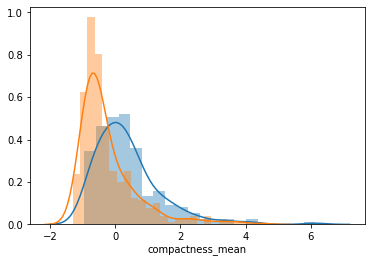

In [39]:
plot_m = sns.distplot(X_norm[data.diagnosis == 'M']['compactness_mean'])
plot_b = sns.distplot(X_norm[data.diagnosis == 'B']['compactness_mean'])

We can see that the distribution are skewed which indicates that the median and mean are different for both variables.

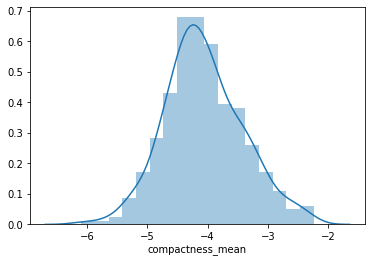

In [40]:
import numpy as np

sns.distplot(np.log(data[data.diagnosis == 'B'].compactness_mean))

## Bootstrapping

Bootstrapping means to resample with replacement.

In [41]:
import random
import pandas as pd

def bootstrap_dataset(dataset):
    size = dataset.shape[0]
    bootstrapped = []
    for i in range(size):
        row = random.randint(0,size-1)
        bootstrapped.append(dataset.iloc[row].to_list())
    return pd.DataFrame(np.array(bootstrapped), columns=dataset.columns)

## Exploratory Analysis

To figure out what features are predictive for malignant tumor, we are going to plot the distributions for each feature in the case of a benign and malignant tumor. The variables that will have a visual decision border can be considered to be predictive and interesting.

[Text(0, 0, 'radius_mean'),
 Text(0, 0, 'radius_sd_error'),
 Text(0, 0, 'radius_worst'),
 Text(0, 0, 'texture_mean'),
 Text(0, 0, 'texture_sd_error'),
 Text(0, 0, 'texture_worst'),
 Text(0, 0, 'perimeter_mean'),
 Text(0, 0, 'perimeter_sd_error'),
 Text(0, 0, 'perimeter_worst'),
 Text(0, 0, 'area_mean'),
 Text(0, 0, 'area_sd_error'),
 Text(0, 0, 'area_worst'),
 Text(0, 0, 'smoothness_mean'),
 Text(0, 0, 'smoothness_sd_error'),
 Text(0, 0, 'smoothness_worst'),
 Text(0, 0, 'compactness_mean'),
 Text(0, 0, 'compactness_sd_error'),
 Text(0, 0, 'compactness_worst'),
 Text(0, 0, 'concavity_mean'),
 Text(0, 0, 'concavity_sd_error'),
 Text(0, 0, 'concavity_worst'),
 Text(0, 0, 'concave_points_mean'),
 Text(0, 0, 'concave_points_sd_error'),
 Text(0, 0, 'concave_points_worst'),
 Text(0, 0, 'symmetry_mean'),
 Text(0, 0, 'symmetry_sd_error'),
 Text(0, 0, 'symmetry_worst'),
 Text(0, 0, 'fractal_dimension_mean'),
 Text(0, 0, 'fractal_dimension_sd_error'),
 Text(0, 0, 'fractal_dimension_worst')]

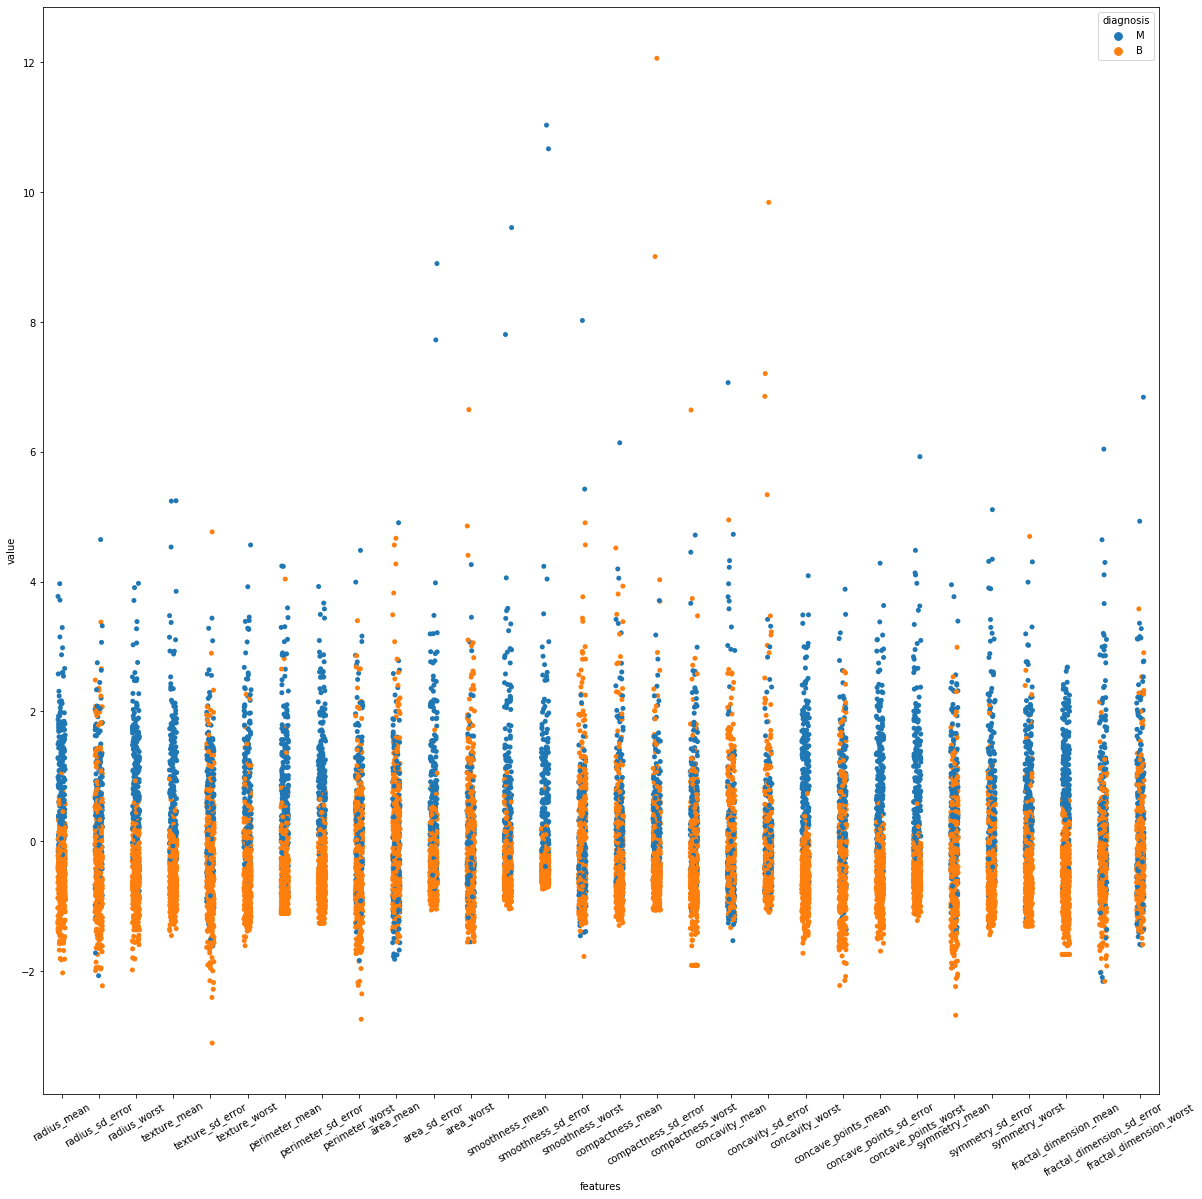

In [42]:
figure, ax = plt.subplots(figsize=(20,20))

data_boxplot = pd.melt(pd.concat([data.diagnosis, X_norm], axis=1), id_vars="diagnosis", var_name="features", value_name='value')
g = sns.stripplot(x='features', y="value", hue="diagnosis", data=data_boxplot, ax=ax)
g.set_xticklabels(X_norm.columns, rotation=30)

This plot allows us to chose some variables that we can explore further and spot outliers:
- perimeter_mean
- smoothness_mean
- concave_points_mean


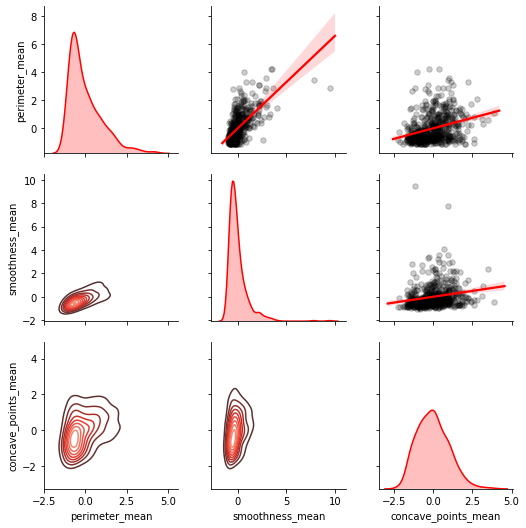

In [43]:
g = sns.PairGrid(X_norm[['perimeter_mean', 'smoothness_mean', 'concave_points_mean']])
g = g.map_upper(
    sns.regplot, scatter_kws={"color": "black", "alpha": 0.2, "s": 30},
    line_kws={"color": "red"}
)
g = g.map_lower(sns.kdeplot, cmap="Reds_d")
g = g.map_diag(sns.kdeplot, shade=True, color='r')

We see that when concave_points_mean is increasing, smoothness_mean and perimeter_mean are increasing.

## Modelling

We chose to run two different models for this classification task : a random forest and a logistic regression.
One has the advantage to be easily interpretable being a linear model, while the other is less interpretable because of the multiple trees involved.

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(X[features], data.diagnosis, test_size=0.3, random_state=42, stratify=data.diagnosis)
clf = RandomForestClassifier(random_state=10)  

#Hyperparameter tuning

param_grid = {
    'n_estimators' : list(range(10,101,10)),
    'max_features' : list(range(5,17,5)),
    'max_depth': list(range(1,15,2))
    }
        
clf_best = GridSearchCV(clf, param_grid = param_grid, cv = 5, verbose=True, n_jobs=4)
clf_best.fit(X_train,y_train)
print("Best paramater's score:" % clf_best.best_score_)

Fitting 5 folds for each of 210 candidates, totalling 1050 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done 170 tasks      | elapsed:    7.6s
[Parallel(n_jobs=4)]: Done 620 tasks      | elapsed:   28.1s
[Parallel(n_jobs=4)]: Done 1043 out of 1050 | elapsed:   51.4s remaining:    0.3s
[Parallel(n_jobs=4)]: Done 1050 out of 1050 | elapsed:   52.5s finished


Best paramater's score:


In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV


pca = PCA()
clf_logreg = LogisticRegression(solver='liblinear', max_iter=4000)      

pipe = Pipeline(steps=[('pca', pca), ('logistic', clf_logreg)])

data_logreg = data.replace({'diagnosis': {'B': 0, 'M': 1}})

param_grid = {
    'pca__n_components': [5, 10, 15],
    'logistic__C': np.logspace(-4, 4, 20),
    'logistic__penalty': ['l1', 'l2']
}

search = GridSearchCV(pipe, param_grid, iid=False, cv=5, n_jobs=2)
X_train, X_test, y_train, y_test = train_test_split(X[features], data_logreg.diagnosis, test_size=0.3, random_state=42, stratify=data.diagnosis)

search.fit(X_train, y_train)

print("Best parameter (CV score=%0.3f):" % search.best_score_)
search.best_params_

Best parameter (CV score=0.977):


{'logistic__C': 3792.690190732246,
 'logistic__penalty': 'l2',
 'pca__n_components': 15}

In [52]:
cm = confusion_matrix(y_test,search.best_estimator_.predict(X_test))
cm

array([[105,   2],
       [  8,  56]])

To control overfitting, we perform crossvalidation and set a maximum tree depth for our random forest.
For our logistic regression model, we use regularization techniques such as lasso or ridge.

## Finding most important features

With random forest, we have a feature_importance attribute that helps us understand which parameters are important (though it seems to be biased, cf https://explained.ai/rf-importance/):

In [47]:
feature_importance = [(x, y) for x ,y in zip(X[features].columns, clf_best.best_estimator_.feature_importances_)]

[Text(0, 0, 'radius_mean'),
 Text(0, 0, 'perimeter_mean'),
 Text(0, 0, 'smoothness_mean'),
 Text(0, 0, 'concave_points_mean'),
 Text(0, 0, 'fractal_dimension_sd_error'),
 Text(0, 0, 'symmetry_mean'),
 Text(0, 0, 'radius_sd_error'),
 Text(0, 0, 'compactness_sd_error'),
 Text(0, 0, 'texture_sd_error'),
 Text(0, 0, 'concavity_sd_error'),
 Text(0, 0, 'compactness_worst'),
 Text(0, 0, 'area_mean'),
 Text(0, 0, 'concavity_mean'),
 Text(0, 0, 'fractal_dimension_worst'),
 Text(0, 0, 'compactness_mean'),
 Text(0, 0, 'smoothness_worst'),
 Text(0, 0, 'area_worst'),
 Text(0, 0, 'perimeter_worst')]

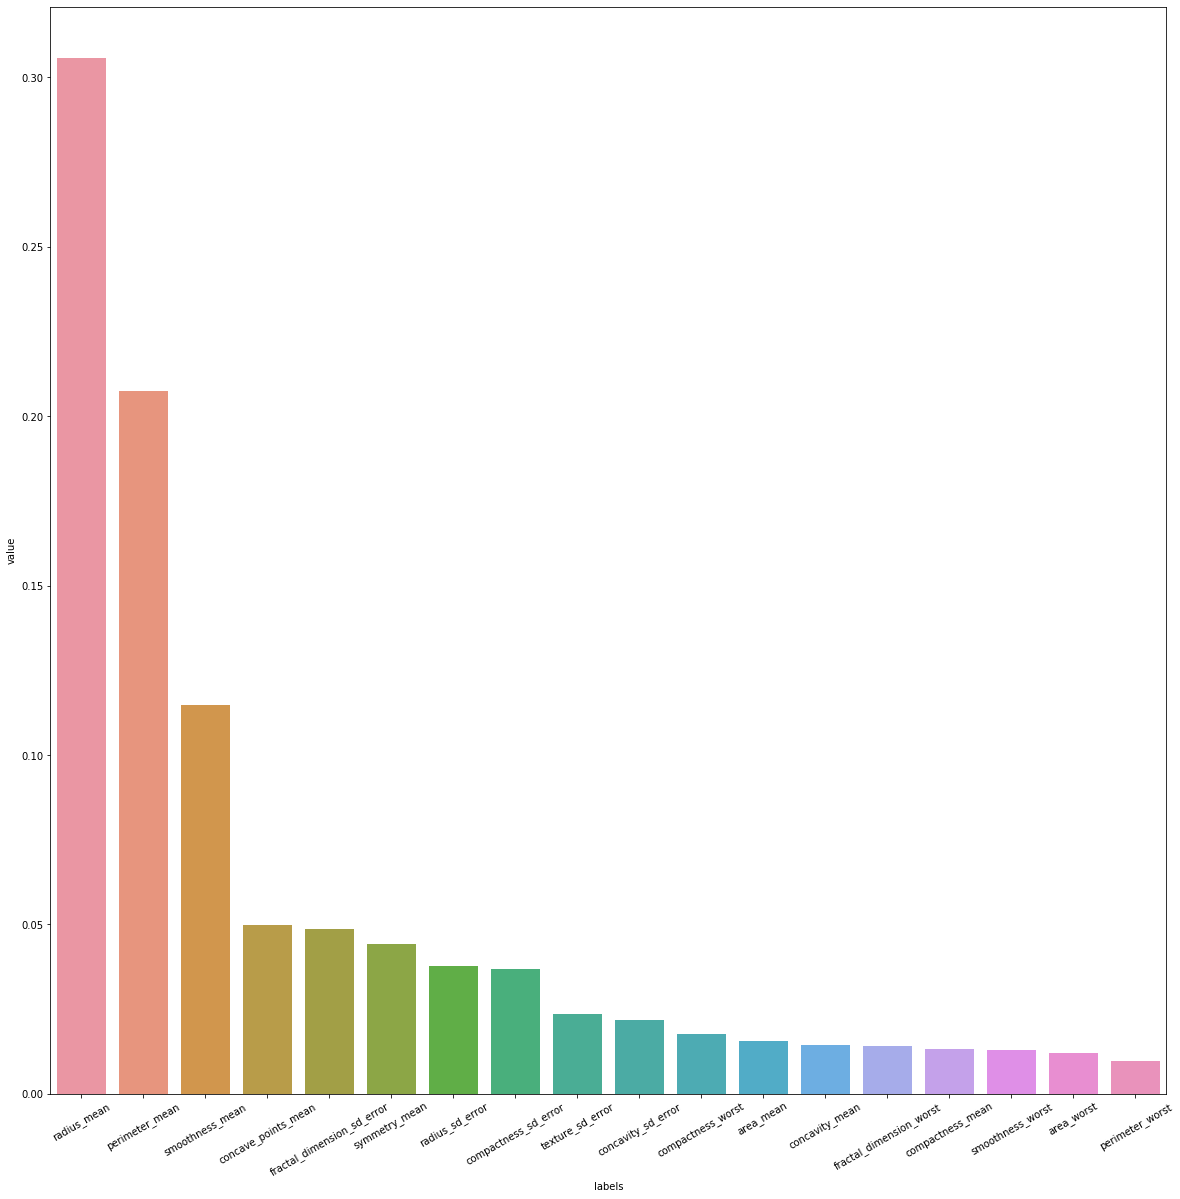

In [55]:
_, ax = plt.subplots(figsize=(20,20))

feature_importance.sort(key=lambda x: x[1], reverse=True)
labels, value = zip(*feature_importance)
g = sns.barplot(x='labels', y='value', data=pd.DataFrame({'labels': labels, 'value': value}), ax=ax)
g.set_xticklabels(labels, rotation=30)

The top features given by the random forest classifier are :
- radius_sd_error
- perimeter_mean
- area_worst

To identify the feature importance from our logistic regression, we can have a look to the coefficient and check their value. The higher is it, the bigger the importance is. Since we are doing a PCA before, we can check the value of the respective eigenvectors' components. The bigger the value is, the more the feature contributes to that component.

By plotting the explained variance ratio, we can see that 2 components are enough to explain the variance.

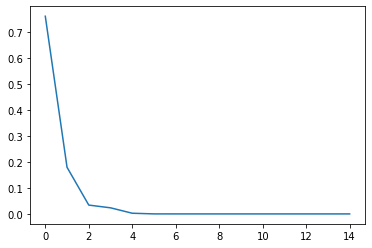

In [49]:
plt.plot(search.best_estimator_[0].explained_variance_ratio_)

We check for the two first components which features have the bigger weights :

In [50]:
pd.DataFrame(search.best_estimator_[0].components_).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.003478,0.075536,0.182929,0.554564,0.000071,0.000390,-0.000089,0.028753,-0.000016,0.000351,0.000352,0.000110,-0.000066,-3.838436e-06,0.807742,0.000577,0.001688,0.000374
1,0.013596,0.403809,0.891952,-0.079344,0.000877,0.000973,-0.000483,-0.030239,-0.000077,0.001070,0.001644,0.000661,0.000074,-3.586120e-07,-0.184275,0.000448,0.001244,-0.000382
2,0.002133,0.535905,-0.272797,0.658785,-0.000370,0.001464,0.000748,0.085955,0.000750,0.003189,0.004630,0.001068,0.002367,5.032262e-04,-0.443681,-0.004023,-0.009217,-0.001320
3,0.013832,0.719302,-0.294938,-0.501882,0.003815,0.006268,0.002127,0.170627,0.000597,0.003127,0.004969,0.000926,0.001874,4.857244e-04,0.337937,0.005597,0.009056,0.003742
4,-0.008507,-0.161445,0.097337,0.010250,-0.003910,-0.004247,-0.001618,0.979417,0.001504,0.001296,0.005643,0.001242,0.004155,7.881416e-04,-0.048697,-0.016798,-0.046210,-0.012087


In [51]:
print('Important features are: ')
print(features[1])
print(features[2])
print(features[3])
print(features[14])

Important features are: 
smoothness_mean
radius_mean
radius_sd_error
concave_points_mean


## Comments

Some limitations of the analysis is the interpretation of the feature. In business cases, we can get intuition from features that tells a story but in this case, features are too abstract to come up with a story.
We need to avoid false negative (we don't want to tell a patient that he doesn't have cancer when he actually does) so we want to maximize recall.
We could also test boosted trees that are better learners than random forests (but longer because they are sequentially).

In this notebook, we tried two models after making sure we are removing correlated features.
Usually, first models to try when we are in a classification problems are random forest and logistic regression.
Those models helped us identify important predictive variables, and combine to our previous visualisations, we can interpret that those variables tends to contribute to a tumor identification when they are at a certain level.

##  Student's samples

- Student 1 :
    - don't forget to encode categorical data for linear regression
    - incorrect naming d, x1, x2 too confusing
    - wrong location for importing (always in beginning )
    - double import
    - cv to 1 (useless)
- Student 2 :
    - don't forget to encode categorical data for linear regression
    - code seems correct

Methodology :
- it's important to have an exploratory phase first before going into modelling.
- I would encourage the student to explain what is happening during the cross_validation and try more sophisticated models.
- In the case of the LinearRegression, it would be interesting to scatterplot and see if there is a linear correlation.